# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

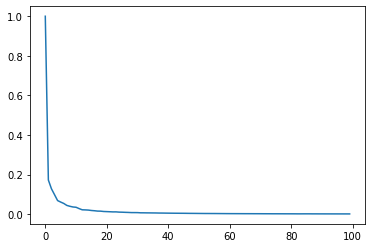

In [3]:
# Samples corresponding to the last digit of your roll number (plot a)
x, = train_labels.shape
roll = 4
samples=[]
for i in range(x):
    if train_labels[i] == roll:
        samples.append(train_data[i])

list(map(list, zip(*samples)))
data = np.array(samples)
cov_data = np.cov(data)
eigen_val, eigen_vec = np.linalg.eig(cov_data)

min_eig = np.min(eigen_val)
max_eig = np.max(eigen_val)

eigen_val = (eigen_val - min_eig) / (max_eig - min_eig)
eigen_val = np.abs(eigen_val)
plt.plot(eigen_val[:100])
plt.show()

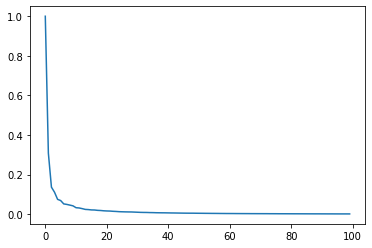

In [16]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
x, = train_labels.shape
roll = (4+1)%10
samples=[]
for i in range(x):
    if train_labels[i] == roll:
        samples.append(train_data[i])

list(map(list, zip(*samples)))
data = np.array(samples)
cov_data = np.cov(data)
eigen_val, eigen_vec = np.linalg.eig(cov_data)

min_eig = np.min(eigen_val)
max_eig = np.max(eigen_val)

eigen_val = (eigen_val - min_eig) / (max_eig - min_eig)
eigen_val = np.abs(eigen_val)
plt.plot(eigen_val[:100])
plt.show()

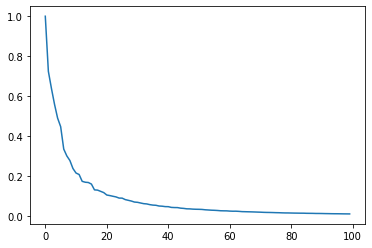

In [17]:
# All training data (plot c)
data = np.transpose(train_data)
cov_data = np.cov(data)
eigen_val, eigen_vec = np.linalg.eig(cov_data)

min_eig = np.min(eigen_val)
max_eig = np.max(eigen_val)

eigen_val = (eigen_val - min_eig) / (max_eig - min_eig)
eigen_val = np.abs(eigen_val)
plt.plot(eigen_val[:100])
plt.show()

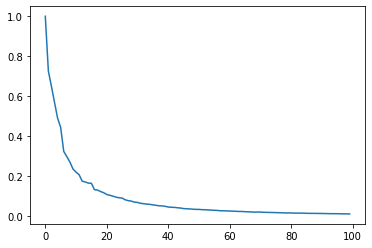

In [20]:
# Randomly selected 50% of the training data (plot d)

train_tmp = train_data
np.random.shuffle(train_tmp)

train_tmp = train_tmp[:x//2, :]

data = np.transpose(train_tmp)
cov_data = np.cov(data)
eigen_val, eigen_vec = np.linalg.eig(cov_data)

min_eig = np.min(eigen_val)
max_eig = np.max(eigen_val)

eigen_val = (eigen_val - min_eig) / (max_eig - min_eig)
eigen_val = np.abs(eigen_val)
plt.plot(eigen_val[:100])
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit) <br>
Plots a and b are a lot similar, compared to other plots, because the difference in no. of samples between a and b is very less indicating that the plots along the dimensions are very similar. <br>
Whereas b and c have much different plots since the difference in the number of samples is much greater here. <br>
Approximate ranks:
1st plot:60, 
2nd plot - 60,
3rd plot - 100+,
4th plot - 100+

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Your answers here (double click to edit)
1. The MNIST images are binary i.e. they can have only two values. Since all images are of dimensions 784x784, 2^(784x784) images are possible.
2. We have access to only 7000 samples which (7000/2^(784x784))x100 percent of the data.
3. If we had access to all the data, the eigen value spectrum would consist of more non-zero values due to the increase in number of samples and covariance matrix would be a diagonal matrix with variance = 0.25
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit)

There is no change when an orthomormal matrix is multiplied to the data because an orthonormal matrix preserves the dimensions and the dot product of all the vectors in the data.

---

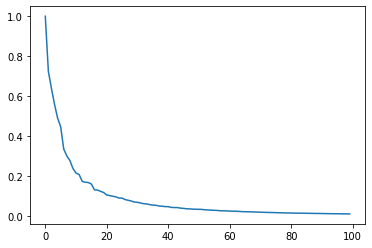

In [4]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

A = np.random.rand(784,784)
Q, R = np.linalg.qr(A)
Q = np.transpose(Q)

new_data = np.transpose(train_data)
data = np.dot(Q, new_data)

cov_data = np.cov(data)
eigen_val, eigen_vec = np.linalg.eig(cov_data)

min_eig = np.min(eigen_val)
max_eig = np.max(eigen_val)

eigen_val = (eigen_val - min_eig) / (max_eig - min_eig)
eigen_val = np.abs(eigen_val)
plt.plot(eigen_val[:100])
plt.show()

# code goes here

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)

Let the matrix multiplied to the samples be A.
The eigen spectrum of the data after multiplication will have all zero values except for one or two peaks depending upon the rank of A.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

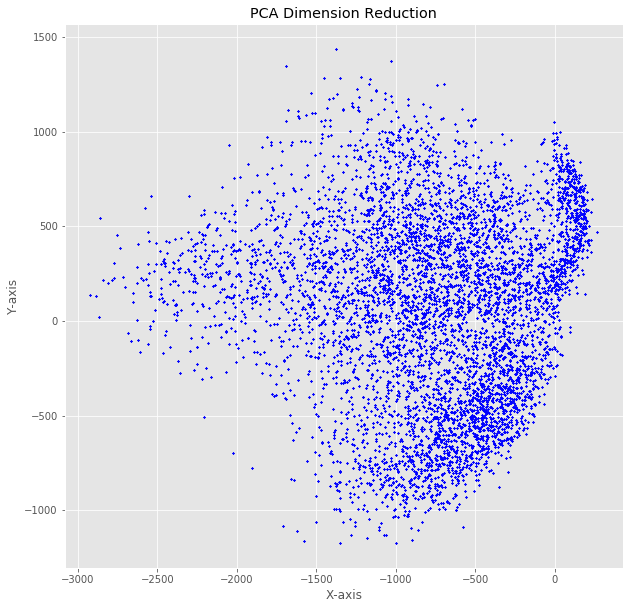

In [48]:
# Plotting code here

data = np.transpose(train_data)

cov_data = np.cov(data)
eigen_val, eigen_vec = np.linalg.eigh(cov_data)

eigen_vec = eigen_vec[:, ::-1].real
eigen_val = eigen_val.real

x_data = eigen_vec[:,0]
y_data = eigen_vec[:,1]

projection_x = np.dot(train_data, x_data)
projection_y = np.dot(train_data, y_data)

plt.figure(figsize=(10,10))
plt.scatter(projection_x, projection_y, marker="x", color='blue', s=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('PCA Dimension Reduction')
plt.style.use('ggplot')
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [288]:
# Print accuracy on the test set using MLE
def probab(dp, pdet, pinv, mean):
    x = np.transpose(dp) - mean
    temp = np.dot(np.transpose(x), pinv)
    prob = -0.5 * (pdet + np.dot(temp, x))
    return prob

def find_cov_mean(samples):     
    samples = np.transpose(np.array(samples))
    mean = np.mean(samples, axis=1)
    cov = np.cov(samples)
    return mean, cov;
  
def find_pinv_pdet(cov_matrix):
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    eigvals = np.log(eigvals[eigvals > 1e-6])
    pdetf = np.sum(eigvals)
    pinvf = np.linalg.pinv(cov_matrix)
    
    return pdetf, pinvf
    
cov_data = []
mean_data = []
pdet_data = []
pinv_data = []
accurate_count = 0

for i in range(10):
    samples = []
    for j in range(train_labels.shape[0]):
        if(train_labels[j] == i):
            samples.append(train_data[j])
    mean, cov = find_cov_mean(samples)
    mean_data.append(mean)
    cov_data.append(cov)
    
    pdet, pinv = find_pinv_pdet(cov_data[i])
    pdet_data.append(pdet)
    pinv_data.append(pinv)
    
for i in range(test_labels.shape[0]):
    prob = []
    for j in range(10):
        prob1 = probab(test_data[i], pdet_data[j], pinv_data[j], mean_data[j])
        prob.append((prob1, j))
    prob.sort(key = lambda x: x[0], reverse=True)
    class_x = prob[0][1]
    if (class_x == test_labels[i]):
        accurate_count += 1
        
accuracy = 100*(accurate_count / test_labels.shape[0])
print ("Accuracy of MLE: " + repr(accuracy) + '%')

Accuracy of MLE: 74.4%


In [290]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

# The prior has been assumed to be the number of samples in each class divided by total samples in training data.
# But this prior comes out to be equal for every class, adding nothing to the relative probabilities between classes.

def probab(dp, pdet, pinv, mean, prior):
    x = np.transpose(dp) - mean
    temp = np.dot(np.transpose(x), pinv)
    prob = -0.5 * (pdet + np.dot(temp, x) + prior)
    return prob


cov_data = []
mean_data = []
pdet_data = []
pinv_data = []
priors = []
accurate_count = 0

prior_factor = train_labels.shape[0]
for i in range(10):
    samples = []
    for j in range(train_labels.shape[0]):
        if(train_labels[j] == i):
            samples.append(train_data[j])
    
    mean, cov = find_cov_mean(samples)
    mean_data.append(mean)
    cov_data.append(cov)
    
    pdet, pinv = find_pinv_pdet(cov_data[i])
    pdet_data.append(pdet)
    pinv_data.append(pinv)
    
    prior = len(samples[i])/prior_factor
    priors.append(prior)

priors = np.array(priors)
for i in range(test_labels.shape[0]):
    prob = []
    for j in range(10):
        prior = np.log(priors[j])
        prob1= probab(test_data[i], pdet_data[j], pinv_data[j], mean_data[j], prior)
        prob.append((prob1, j))
    
    prob.sort(key = lambda x: x[0], reverse=True)
    class_x = prob[0][1]
    if (class_x == test_labels[i]):
        accurate_count += 1

accuracy = 100 * (accurate_count / test_labels.shape[0])
print ("Accuracy of MAP: " + repr(accuracy) + '%')
    


Accuracy of MAP: 74.4%


In [292]:
# Print accuracy using Bayesian pairwise majority voting method

def probab(dp, pdet, pinv, mean):
    x = np.transpose(dp) - mean
    temp = np.dot(np.transpose(x), pinv)
    prob = -0.5 * (pdet + np.dot(temp, x))
    return prob

cov_data = []
mean_data = []
pdet_data = []
pinv_data = []
accurate_count = 0

for i in range(10):
    samples = []
    for j in range(train_labels.shape[0]):
        if(train_labels[j] == i):
            samples.append(train_data[j])
    mean, cov = find_cov_mean(samples)
    mean_data.append(mean)
    cov_data.append(cov)
    
    pdet, pinv = find_pinv_pdet(cov_data[i])
    pdet_data.append(pdet)
    pinv_data.append(pinv)

pair_pinv_data = [[] for i in range(100)]
pair_pdet_data = [[] for i in range(100)]

for i in range(10):
    for j in range(i+1, 10):
        ind = 10*i + j
        pair_cov = (cov_data[i] + cov_data[j]) / 2
        pair_pinv_data[ind] = np.linalg.pinv(pair_cov)
        
        pair_eigvals, pair_eigvecs = np.linalg.eigh(pair_cov)
        pair_eigvals = np.log(pair_eigvals[pair_eigvals > 1e-6])
    
        pair_pdet_data[ind] = np.sum(pair_eigvals)

for x in range(test_labels.shape[0]):
    prob_freq = []
    for i in range(10):
        for j in range(i+1, 10):   
            ind = 10*i + j
            prob1 = probab(test_data[x], pair_pdet_data[ind], pair_pinv_data[ind], mean_data[i])
            prob2 = probab(test_data[x], pair_pdet_data[ind], pair_pinv_data[ind], mean_data[j])    
            if prob1 >= prob2:
                prob_freq.append(i)
            
            else:
                prob_freq.append(j)
            

    class_x = max(prob_freq, key = prob_freq.count)
    if (class_x == test_labels[x]):
        accurate_count += 1

accuracy = 100 * (accurate_count / test_labels.shape[0])
print ("Accuracy of Bayesian Pairwise Majority : " + repr(accuracy) + '%' )
         

Accuracy of Bayesian Pairwise Majority : 83.89999999999999%


In [293]:
# Print accuracy using Simple Perpendicular Bisector majority voting method

mean_data = []
accurate_count = 0

def dist(d1, d2):
    return np.linalg.norm(d1 - d2)

for i in range(10):
    samples = []
    for j in range(train_labels.shape[0]):
        if(train_labels[j] == i):
            samples.append(train_data[j])
    samples = np.transpose(np.array(samples))
    
    mean = np.mean(samples, axis=1)
    mean_data.append(mean)
    
for x in range(test_labels.shape[0]):
    prob = []
    for i in range(10):
        for j in range(i+1, 10):
            dp = np.transpose(test_data[x]) 
            if dist(dp, mean_data[i]) <= dist(dp, mean_data[j]):
                prob.append(i)
            
            else:
                prob.append(j)
            
    
    class_x = max(prob, key = prob.count)
    if class_x == test_labels[x]:
        accurate_count += 1

accuracy = 100 * (accurate_count / test_labels.shape[0])
print ("Accuracy of Simple Perpendicular Bisector majority : " + repr(accuracy) + "%")
    

Accuracy of Simple Perpendicular Bisector majority : 77.0%


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit) <br>
Accuracy of the classifiers: <br>
MLE: 74.4 <br>
MAP: 74.4 <br>
BPM: 83.9 <br>
SPBM: 77.0 <br>

This suggests that pairwise majority classifiers are much better than multivariate normal methods at predicting the class of data samples. This is because linear classifiers are good at predicting classes since they prevent overfitting as opposed to curves of higher polynomials. We can easily predict the class if a sample belongs to one or the other class rather than finding the most suitable class out of many. 

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [120]:
# Your code here
def predict_class(test_dp, train_data, train_labels, k):
    dist = []
    for i in range(train_data.shape[0]):
        distance = np.linalg.norm(train_data[i] - test_dp)
        dist.append((train_labels[i], distance))
    dist.sort(key = lambda x: x[1])
   
    neighbours = []
    for i in range(k):
        neighbours.append(dist[i][0])
        
    classvotes = max(neighbours, key = neighbours.count)

    return classvotes

def Accuracy(test_data, predictions, test_labels):
    correct = 0
    for x in range(len(test_data)):
        if test_labels[x] == predictions[x]:
            correct += 1
    return (correct/float(len(test_data))) * 100.0

# Print accuracies with K = 1, 3, 7

predictions = []
count = 0
test_new = []

k = 1
for i in range(test_data.shape[0]):
    test_new.append(test_data[i])
    result = predict_class(test_data[i], train_data, train_labels, k)
    predictions.append(result)

accuracy = Accuracy(test_new, predictions, test_labels)
print('Accuracy: ' + repr(accuracy) + '%')

predictions = []
k = 3
test_new = []
for i in range(test_data.shape[0]):
    test_new.append(test_data[i])
    result = predict_class(test_data[i], train_data, train_labels, k)
    predictions.append(result)

accuracy = Accuracy(test_new, predictions, test_labels)
print('Accuracy: ' + repr(accuracy) + '%')

predictions = []
k = 7
test_new = []
for i in range(test_data.shape[0]):
    test_new.append(test_data[i])
    result = predict_class(test_data[i], train_data, train_labels, k)
    predictions.append(result)

accuracy = Accuracy(test_new, predictions, test_labels)
print('Accuracy: ' + repr(accuracy) + '%')



Accuracy: 90.7%
Accuracy: 91.9%
Accuracy: 91.7%


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)

1. The accuracies are different for different k values since the no. of comparisons increases with the increasing k values. But after a point, when the value of k becomes too high, the classifier takes in more data which includes data outside the immediate cluster (outliers), hence decreasing the accuracy. 

2. Iterate through the values of k and calculate the accuracy. As soon as the accuracy starts decreasing, report the value of k. For this, we do not use test data but divide training data into training and validation data.
---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [122]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [244]:
# new_data = train_data + mixed_data
new_data = np.concatenate((train_data, mixed_data), axis=0)
k=3
def find_neighbours(dp):
    dist = []
    for i in range(new_data.shape[0]):
        distance = np.linalg.norm(new_data[i] - dp)
        dist.append((new_data[i], distance))
    dist.sort(key = lambda x: x[1])
   
    neighbours = []
    for i in range(k):
        neighbours.append(dist[i][0])
    return neighbours
        
def training_neighbours(train_data):
    train_neighbour = []
    for i in range(train_data.shape[0]):
        train_neighbour.append((train_data[i], find_neighbours(train_data[i])))
    return train_neighbour
 
train_neighbour = training_neighbours(train_data)


In [286]:
outliers = []
for x in range(mixed_data.shape[0]):
    flag=0
    for i in range(len(train_neighbour)):
        for j in range(len(train_neighbour[i][1])):
            if np.array_equal(mixed_data[x],train_neighbour[i][1][j]):
                flag=1
    if(flag == 0):
        outliers.append(x)


print(outliers)

[0, 2, 4, 5, 6, 7, 9, 11, 18]


The above list gives the indices of the outliers in mixed_data

### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)

We find out the mean of neatness scores of k nearest neighbours and assign it as the neatness score of the given sample. This results in a regressor since the neatness scores are discrete as opposed to a classifier.

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [3]:
# Your code here
def predict_class(test_dp, train_data, train_labels, k):
    dist = []
    for i in range(train_data.shape[0]):
        distance = np.linalg.norm(train_data[i] - test_dp)
        dist.append((train_labels[i], distance))
    dist.sort(key = lambda x: x[1])
   
    classes = []
    for i in range(k):
        classes.append(dist[i][0])
    
    classes = np.array(classes)
    classes = classes/10
    classvotes = np.mean(classes)

    return classvotes

errors = []
for i in range(test_data.shape[0]):
    prediction = predict_class(test_data[i], train_data, train_labels, 3)
    neat_labels = test_labels / 10
    error = np.abs(neat_labels - prediction)
    errors.append(error)
    
accuracy = np.mean(np.array(errors))*100
print("Accuracy: " + repr(accuracy) + "%")

Accuracy: 32.67466666666665%


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---